In [160]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

EDA begins with importing the csv file as a pandas dataframe. This dataframe was then analyzed according to the provided data dictionary to determine the appropriate path to move forward. According to the data dictionary, it was given that all columns contained integer or continious numeric variables other than the LeagueIndex which was representative of the various ranks in Starcraft. 

In [161]:
playerdata = pd.read_csv("starcraft_player_data.csv")

In [162]:
playerdata.set_index("GameID")

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000


In [163]:
data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


ETL: With the EDA understanding, the next step was to locate any null values in the dataset. Although dropna did not result in any changes, there were '?' in the dataset that were functionally identical to a null value. 

In [164]:
data[data['Age']=='?']

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed


In [165]:
data.replace('?', np.nan, inplace=True)
data=data.dropna()
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['HoursPerWeek'] = pd.to_numeric(data['HoursPerWeek'], errors='coerce')
data['TotalHours'] = pd.to_numeric(data['TotalHours'], errors='coerce')


Further examination into the column found that the columns were not numeric and were then adjusted accordingly for the model.

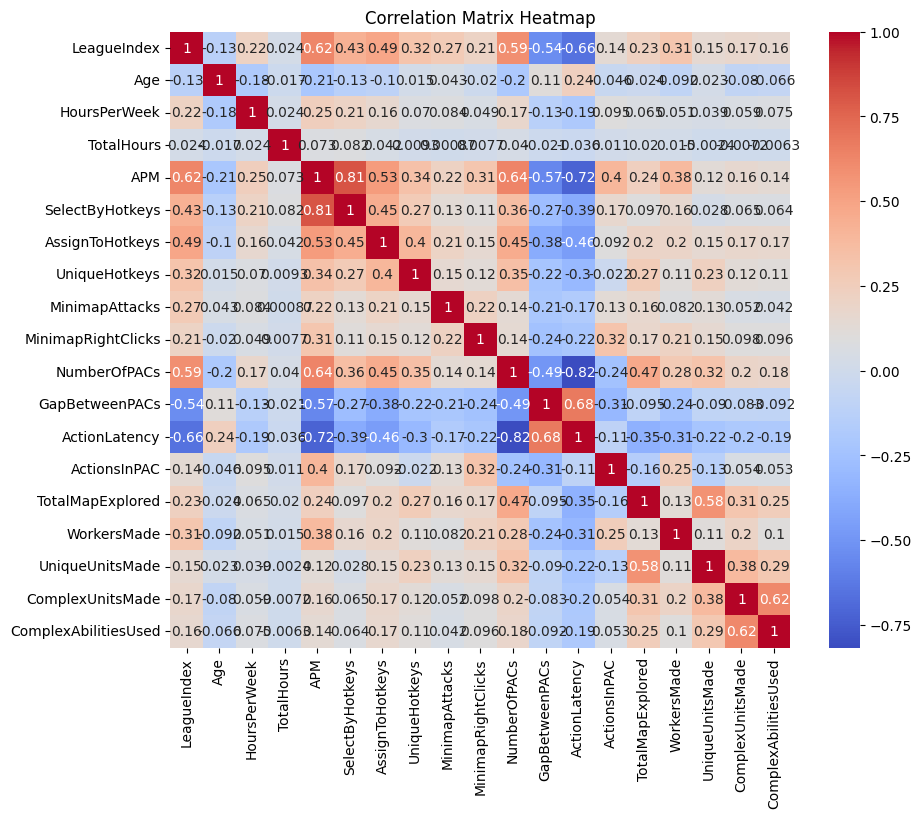

In [166]:
# Calculate correlation matrix
corr_matrix = data.drop(['GameID'], axis=1).corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

For the modeling, the first step was to realize that the goal or dependent variable being targeted was a categorical variable represented in integers. The predictor columns were placed in a correlation matrix to find and reduce collinearity. Although collinearity was found with the APM and Action Latency, both predictors were indicated to have significant correlation with the target variable. Significance of valeus were also tested and found that the columns of UniqueUnitsMade, ComplexUnitsMade, and COmplexAbilitiesUsed were not important to the model. However, with a DNN, the model will learn from the data and identify the less useful predictors. Therefore, it was decided that all of the predictors will be used for a deep neural network consisting of softmax activation function for classification.

In [172]:
X = data.drop(['GameID','LeagueIndex'], axis=1)
y = data['LeagueIndex']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 1.9013 - accuracy: 0.2015
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 1.6408 - accuracy: 0.3176
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 1.4648 - accuracy: 0.3794
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 1.3995 - accuracy: 0.3993
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3818 - accuracy: 0.3831
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3564 - accuracy: 0.4086
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3481 - accuracy: 0.4082
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3461 - accuracy: 0.4086
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3390 - accuracy: 0.4097
Epoch 10/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3317 - accuracy: 0.4236
Epoch 11/50
54/54 [

Multiple models were attempted including KNN, random forest, simple, decision trees,and even linear regression to find the optimal classification model. Accuracy rates were found to be in the 0.30s for all models with DNN having around 0.4 for the test accuracy as the highest value. Therefore, deep neural network model was used and evaluated with sparse categorical crossentropy loss function to determine effectiveness in the test set. 

**INTERPRETATION**

With the given metrics/predictors we can determine the rank of a starcraft player with an estimated 40% accuracy. Many of the predictors are representative of each other because values such as APM and unitsmade can be very closely related but still have a valuable impact on the rank of the player.

**HYPOTHETICAL**

Some steps to take to collect more informative data based on the EDA and model are to collect data across multiple seasons/years, gather a balanced representation of each rank to provide the learning model with better training sets, collect data on how each player in each game performs against the other player based on rank.